In [3]:
%matplotlib inline 
from __future__ import division
from pylab import *
import skimage as ski

from skimage import data, io, filters, exposure
from skimage.filters import rank
from skimage import img_as_float, img_as_ubyte
from skimage.morphology import disk
import skimage.morphology as mp
from skimage import util
from skimage.color import rgb2hsv, hsv2rgb, rgb2gray
from skimage.filters.edges import convolve

from matplotlib import pylab as plt
import numpy as np
from numpy import array
from IPython.display import display
from ipywidgets import interact, interactive, fixed
from ipywidgets import *
from ipykernel.pylab.backend_inline import flush_figures
from skimage import measure 
from PIL import ImageEnhance
from PIL import Image
import matplotlib.patches as patches
from PIL import ImageDraw
from operator import itemgetter
from collections import Counter
import scipy.misc
import cv2 as cv
import pandas as pd
import glob
import random
from PIL import Image, ImageOps

In [4]:
prefix = ['Image_']
names = ['_1stHO.png','_2ndHO.png']

### Util of photo_with_border_maker 
def add_border(input_image, output_image, border):
    img = Image.open(input_image)
    if isinstance(border, int) or isinstance(border, tuple):
        bimg = ImageOps.expand(img, border=border)
    else:
        raise RuntimeError('Border is not an integer or tuple!')
    bimg.save(output_image)
    
### To add black border (usually 15 px in every direction) 
def photo_with_border_maker():
    border_size = 15
    file_names = [fn for fn in glob.glob("0CHASEDB1/*"+str("01*")+str("HO.png"))] 
    #file_names = [fn for fn in glob.glob("CHASEDB1/*" + "0"+"*.JPG")] 
    print(len(file_names))
    for original_name in file_names:
        # save new photo with borders
        diff_name = str(original_name[0:18])+'AD'+str(original_name[18:])
        print(diff_name)
        # Border allow to cut small photos near border of original images (normally it is out of range)
        add_border(original_name,output_image=diff_name,border=(border_size,border_size,border_size,border_size))

### Crop mask with vessels pixel from original photo  
def crop(image_path, coords, saved_location):
    #coords -> A tuple of x/y coordinates (x1, y1, x2, y2)
    #photo = img_as_float(ski.io.imread(name)) # old method
    
    image_obj = Image.open(image_path)
    cropped_image = image_obj.crop(coords)
    cropped_image.save(saved_location)
    #cropped_image.show()

### Generate training (with mask size) photos   
def training_blood_vessels(name,original_name):
    prefix = str(name[15:18])
    sumWhite,sumBlack,vessels = 0,0,ski.io.imread(name)
        
    #Just to be sure for now.
    print("Shape",vessels.shape)
    io.imshow(vessels)
    far_from_vessels,specSum = 15,0
    
    size_of_frame = 15
    
    
    while(sumWhite < 400):
        y = random.randint(15,974)
        x = random.randint(15,1013)
        if vessels[y][x] == 255 and (sumWhite >= sumBlack-20 or sumWhite <= sumBlack + 50):
            if(sumWhite % 6 != 0):
                crop(original_name, (x-size_of_frame, y-size_of_frame, x+size_of_frame, y+size_of_frame), '1ALL/train/1/'+str(prefix)+'_x_'+str(x)+'_y_'+str(y)+'_111.jpg') 
            else:
                crop(original_name, (x-size_of_frame, y-size_of_frame, x+size_of_frame, y+size_of_frame), '1ALL/validation/1/'+str(prefix)+'_x_'+str(x)+'_y_'+str(y)+'_111.jpg') 
            sumWhite += 1
        if vessels[y][x] == 0 and sumWhite >= sumBlack and not(vessels[y-far_from_vessels][x-far_from_vessels] == 0 and vessels[y-far_from_vessels][x+far_from_vessels] == 0 and vessels[y+far_from_vessels][x-far_from_vessels] == 0 and vessels[y+far_from_vessels][x+far_from_vessels] == 0):
            if(sumBlack % 6 != 0):
                crop(original_name, (x-size_of_frame, y-size_of_frame, x+size_of_frame, y+size_of_frame), '1ALL/train/0/'+str(prefix)+'_x_'+str(x)+'_y_'+str(y)+'_000.jpg') 
            else:
                crop(original_name, (x-size_of_frame, y-size_of_frame, x+size_of_frame, y+size_of_frame), '1ALL/validation/0/'+str(prefix)+'_x_'+str(x)+'_y_'+str(y)+'_000.jpg') 
            sumBlack += 1
        #print(sumWhite,sumBlack)
    specSum += 1
    print(specSum)
    print("Number of white/black pixels:",sumWhite,sumBlack)

In [ ]:
#ACHTUNG ACHTUNG - each time new photos of 0CHASEDEB with black border (+15px each directino).
photo_with_border_maker()

20
Shape (990, 1029)


D:\Anaconda\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


1
Number of white/black pixels: 400 399
Shape (990, 1029)
1
Number of white/black pixels: 400 397
Shape (990, 1029)
1
Number of white/black pixels: 400 400
Shape (990, 1029)
1
Number of white/black pixels: 400 399
Shape (990, 1029)
1
Number of white/black pixels: 400 400
Shape (990, 1029)
1
Number of white/black pixels: 400 398
Shape (990, 1029)
1
Number of white/black pixels: 400 400
Shape (990, 1029)
1
Number of white/black pixels: 400 400
Shape (990, 1029)
1
Number of white/black pixels: 400 397
Shape (990, 1029)
1
Number of white/black pixels: 400 399
Shape (990, 1029)
1
Number of white/black pixels: 400 400
Shape (990, 1029)
1
Number of white/black pixels: 400 397
Shape (990, 1029)
1
Number of white/black pixels: 400 400
Shape (990, 1029)
1
Number of white/black pixels: 400 399
Shape (990, 1029)
1
Number of white/black pixels: 400 400
Shape (990, 1029)
1
Number of white/black pixels: 400 397
Shape (990, 1029)
1
Number of white/black pixels: 400 400
Shape (990, 1029)
1
Number of wh

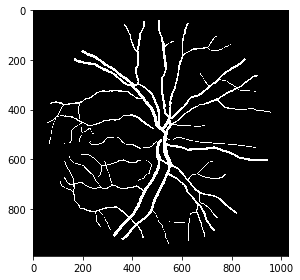

In [6]:
### Take photos from disk and run 'The Machine'

### phoot_hoover (take coords from the final vessel pic(black-white)) cut small (30x30) pic from the original where detected 'vessel hit'
def photo_hoover():
        file_names = [fn for fn in glob.glob("0CHASEDB1/*" + "AD"+"*.JPG")] # start - just 1 photo ... in future with *
        print(len(file_names))
        for original_name in file_names:
            ### Black-White vessels img-s ###
            first_vessels, second_vessels = str(original_name[0:-4])+ names[0], str(original_name[0:-4]) + names[1]
            training_blood_vessels(first_vessels,original_name) ## LEFT EYES
            training_blood_vessels(second_vessels,original_name) ## RIGHT EYES
    
if __name__ == "__main__":
    photo_hoover()
    print('done')